# Importing Packages

In [1]:
import xarray as xr
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cf

# Plot settings

In [2]:
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size': 18, 'figure.figsize': (12.8, 9.6)})
cmap = mpl.cm.get_cmap('cividis')
save_plots = True
s = 1.0 # markersize
mscale = 15 # markerscale for legend

# Empty map

In [3]:
def get_map():
    ax = plt.axes(projection=ccrs.PlateCarree())
    fig = plt.gcf()
    ax.set_extent([3.5,4.6,51.7,52.5])
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.add_feature(cf.RIVERS)
    ax.gridlines(draw_labels=True)
    
    return fig, ax

# Indexing function

In [4]:
def get_index(day, hour, minute):
    ddays = 0 if day-17==0 else (day - 17) * 144
    dhours = 6 * hour
    dminutes = minute/10

    return int(ddays + dhours + dminutes)

In [5]:
get_index(25,0,0)

1152

# Plotting functions

In [6]:
def plot_depth_with_density(output, final_index=288):
    x = output['lon'].values # Longitude
    y = output['lat'].values # Latitude
    z = output['z'].values # Depth
    rho = output['density'].values # Density
    ts = output['time'] # Time stamps
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Time')
    ax.set_ylabel('Depth [m]')
    for j in range(20):
        i=j
        ax.plot(ts[i, 0:final_index], -z[i, 0:final_index], c='k', zorder=1)
        scatter = ax.scatter(ts[i, 0:final_index], -z[i, 0:final_index], c=rho[i, 0:final_index],
                            cmap=plt.cm.jet, edgecolor='k', zorder=2, norm=mpl.colors.Normalize(vmin=1014, vmax=1024))
        
    ax.tick_params(axis="x", rotation=45)
    plt.colorbar(scatter, label="Density [kg m$^{-1}$]")
    
    return plt.gcf()

In [7]:
def plot_final_locations(output, final_index=144):
    x = output['lon'].values # Longitude
    y = output['lat'].values # Latitude
    z = output['z'].values # Depth
    rho = output['density'].values # Density
    ts = output['time'] # Time stamps
    
    fig, ax = get_map()
    ax.scatter(x[0,0], y[0,0], marker='^', c='r')
    scatter = ax.scatter(x[0:20,final_index], y[0:20,final_index], c=-z[0:20,0], s=30, cmap=plt.cm.jet)#, norm=mpl.colors.Normalize(vmin=1012, vmax=1025))
    cax = fig.add_axes([ax.get_position().x1+0.08,ax.get_position().y0,0.02,ax.get_position().height])
    ax.set_extent([3.75, 4.5, 51.8, 52.4])
    plt.colorbar(scatter, cax=cax, label="Initial Depth [m]")
    
    return fig, ax

# Loading output

In [8]:
output = xr.open_dataset("../../Data_local/output_with_depth_17_1_10.nc")

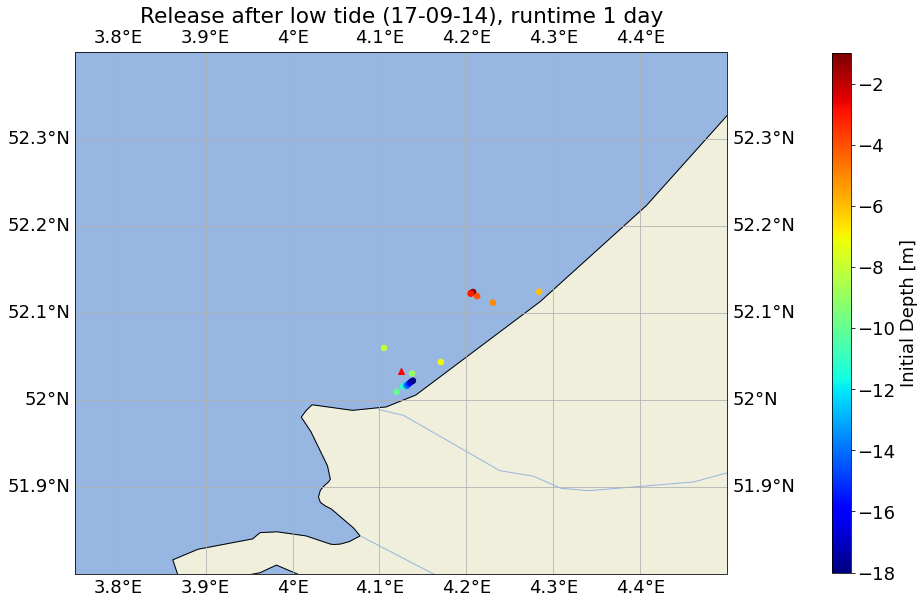

In [9]:
fig, ax = plot_final_locations(output)
ax.set_title("Release after low tide (17-09-14), runtime 1 day")

if save_plots:
    plt.gcf().savefig("../figs/sim_depth_final_locations_1_day_17_09_low_tide.png", bbox_inches="tight")

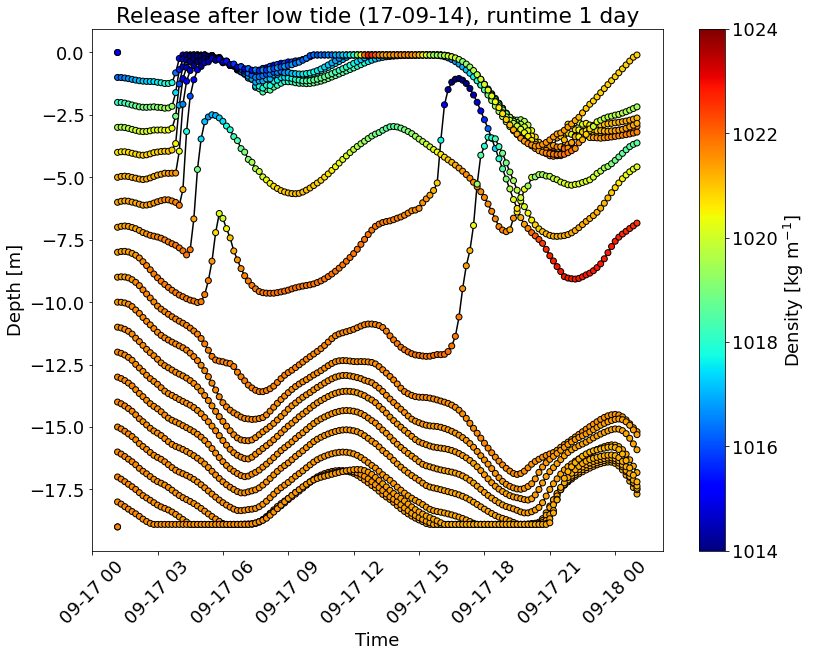

In [10]:
fig = plot_depth_with_density(output, 144)
plt.gca().set_title("Release after low tide (17-09-14), runtime 1 day")
if save_plots:
    fig.savefig("../figs/depth_with_density_17_09_low_tide.png", bbox_inches="tight")

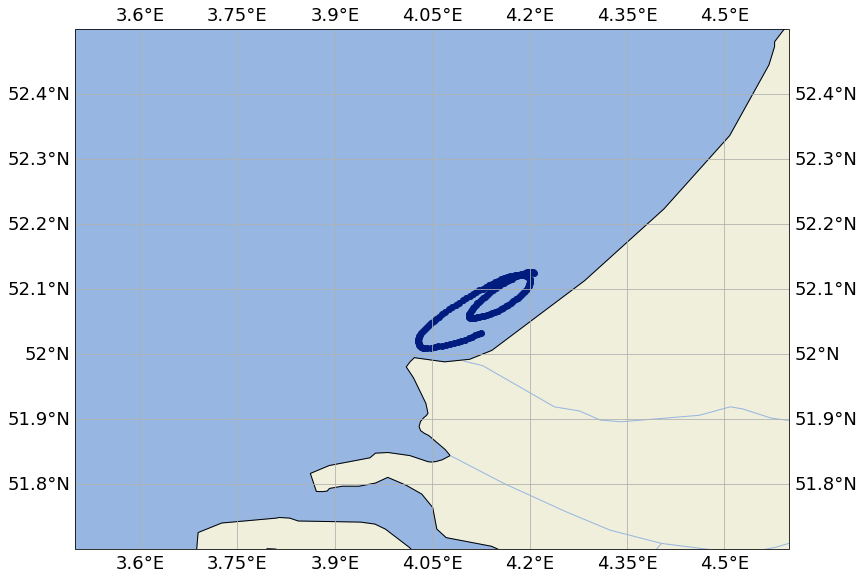

In [11]:
fig, ax = get_map()
x = output['lon'].values # Longitude
y = output['lat'].values # Latitude
ts = output['time'] # Time stamps
ax.scatter(x[1, 0:144], y[1,0:144])

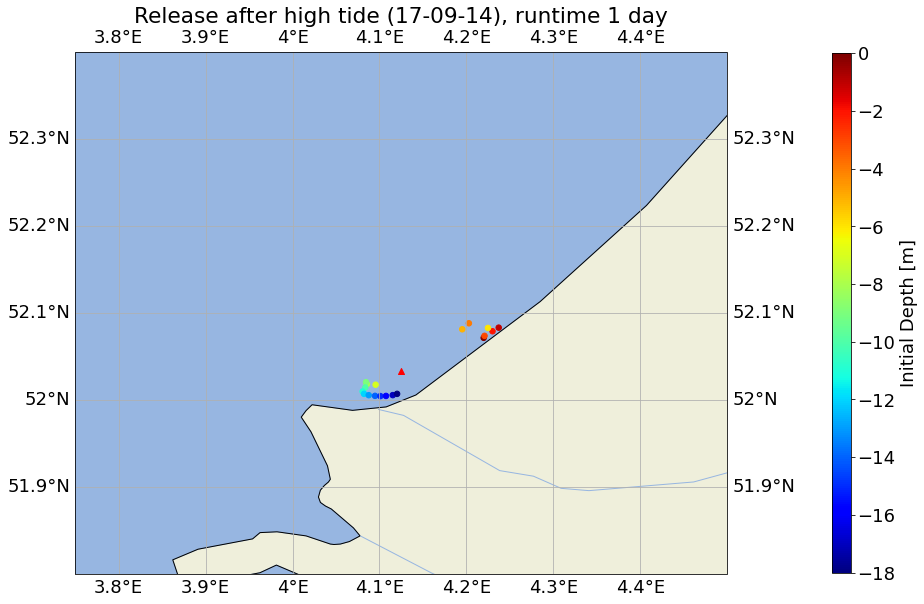

In [12]:
output = xr.open_dataset("../../Data_local/output_with_depth_17_7_40.nc")
fig, ax = plot_final_locations(output)
ax.set_title("Release after high tide (17-09-14), runtime 1 day") # Hardcoded for now

if save_plots:
    plt.gcf().savefig("../figs/sim_depth_final_locations_1_day_17_09_high_tide.png", bbox_inches="tight")

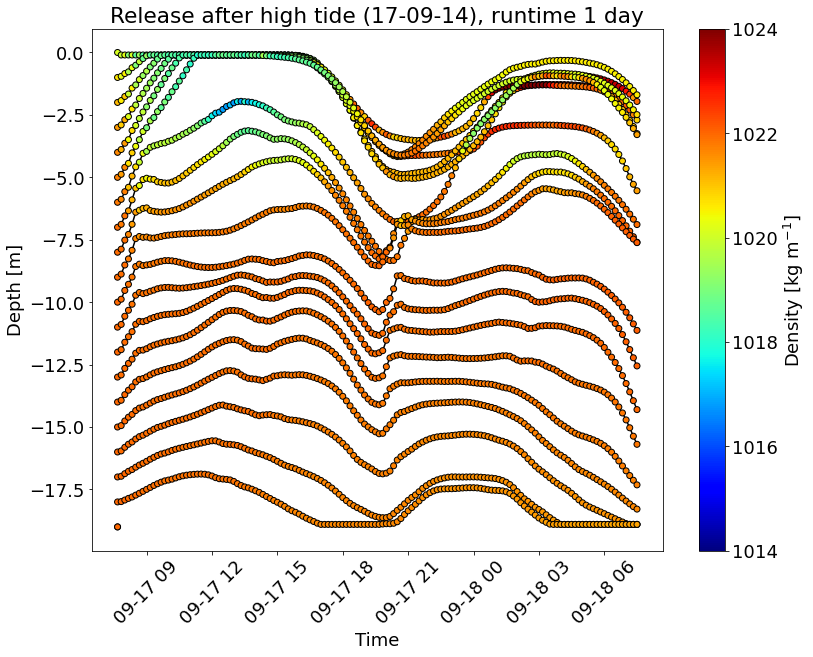

In [13]:
fig = plot_depth_with_density(output, 144)
plt.gca().set_title("Release after high tide (17-09-14), runtime 1 day")
if save_plots:
    fig.savefig("../figs/depth_with_density_17_09_high_tide.png", bbox_inches="tight")

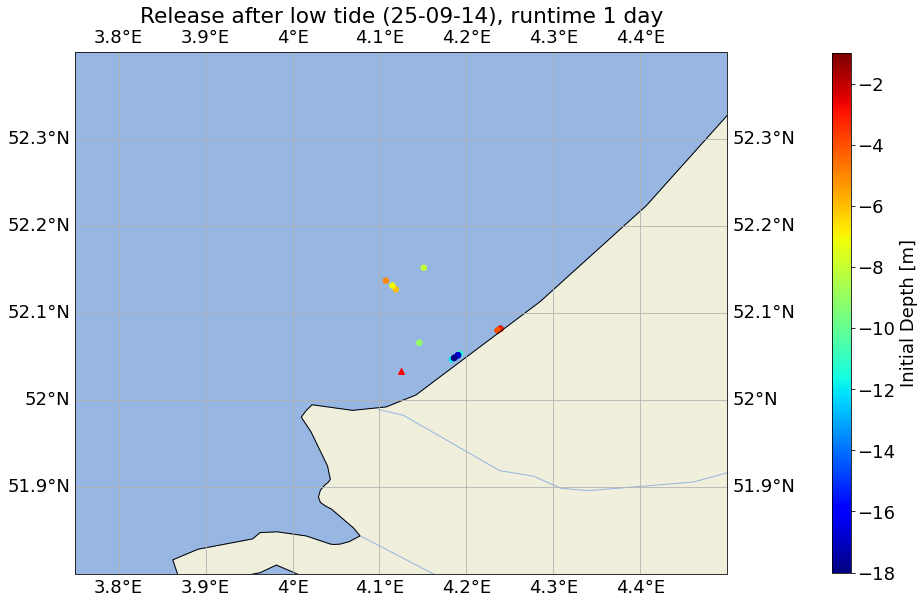

In [14]:
output = xr.open_dataset("../../Data_local/output_with_depth_25_10_0.nc")
fig, ax = plot_final_locations(output)
ax.set_title("Release after low tide (25-09-14), runtime 1 day") # Hardcoded for now
if save_plots:
    plt.gcf().savefig("../figs/sim_depth_final_locations_1_day_25_09_low_tide.png", bbox_inches="tight")
plt.show()

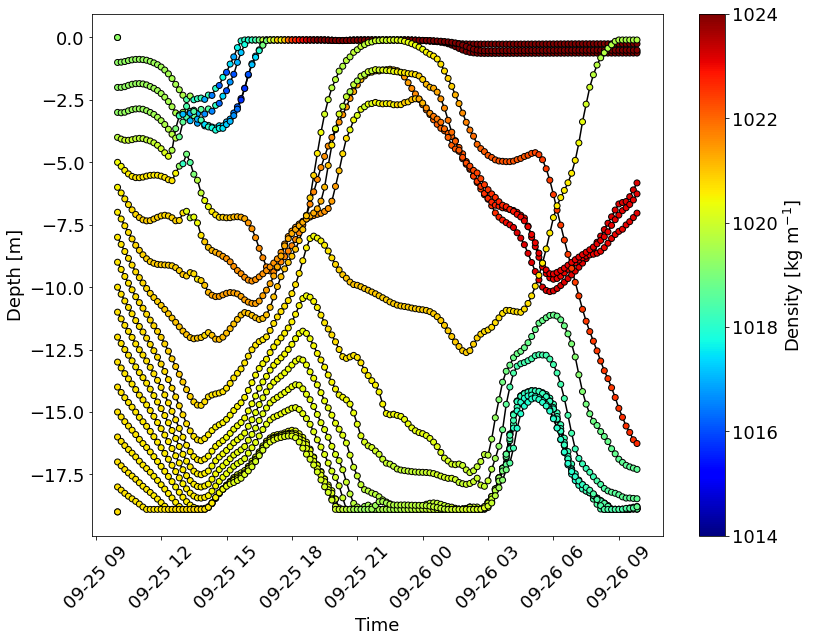

In [15]:
fig = plot_depth_with_density(output, 144)
ax.set_title("Release after low tide (25-09-14), runtime 1 day") # Hardcoded for now
if save_plots:
    plt.gcf().savefig("../figs/depth_with_density_25_09_low_tide.png", bbox_inches="tight")
plt.show()

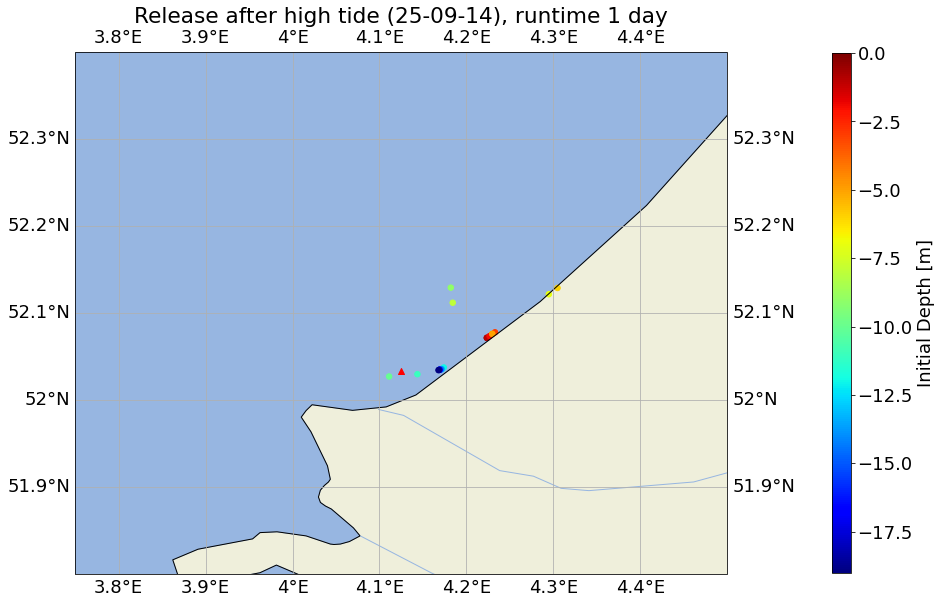

In [16]:
output = xr.open_dataset("../../Data_local/output_with_depth_25_2_10.nc")
fig, ax = plot_final_locations(output)
ax.set_title("Release after high tide (25-09-14), runtime 1 day") # Hardcoded for now
if save_plots:
    plt.gcf().savefig("../figs/sim_depth_final_locations_1_day_25_09_high_tide.png", bbox_inches="tight")
plt.show()

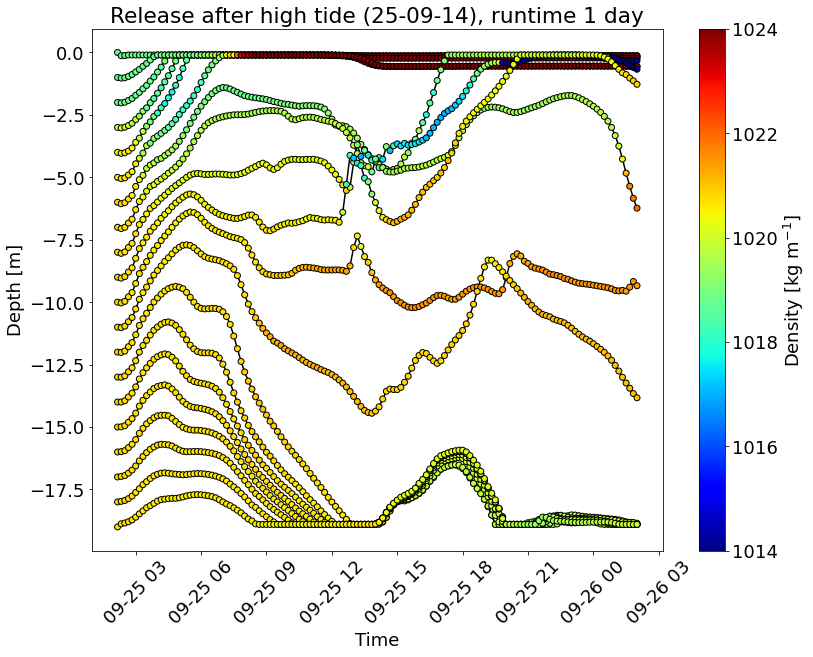

In [17]:
fig = plot_depth_with_density(output, 144)
plt.gca().set_title("Release after high tide (25-09-14), runtime 1 day")
if save_plots:
    fig.savefig("../figs/depth_with_density_25_09_high_tide.png", bbox_inches="tight")

# Big plots

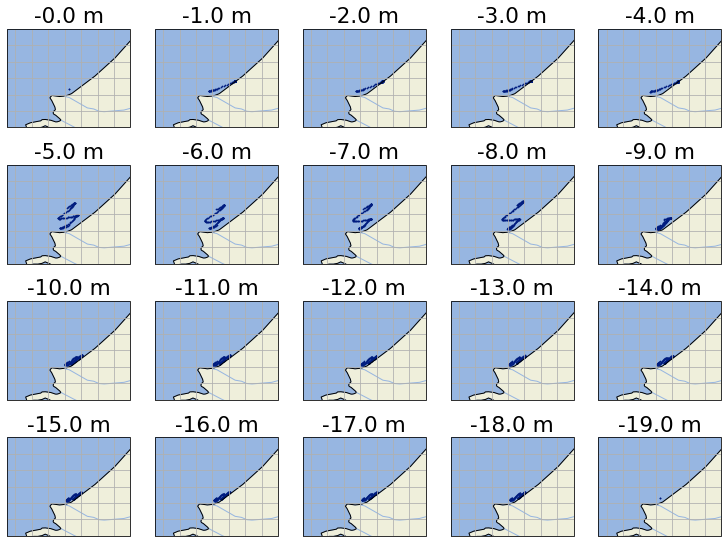

In [18]:
output = xr.open_dataset("../../Data_local/output_with_depth_25_10_0.nc")
x = output['lon'].values # Longitude
y = output['lat'].values # Latitude
z = output['z'].values
plt.subplots(nrows=5, ncols=4)
for i in range(0,20):
    ax = plt.subplot(4,5,i+1, projection=ccrs.PlateCarree())
    ax.set_extent([3.75, 4.5, 51.8, 52.4])
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.add_feature(cf.RIVERS)
    ax.gridlines(draw_labels=False)
    ax.scatter(x[i,0:144], y[i,0:144], s=0.5)
    ax.set_title(f"{-z[i,0]} m")